# HW2

## ML Theoretical questions

#### Question 1:
To evaluate how well our model performs at T1D classification, we need to have evaluation
metrics that measures of its performances/accuracy. Which evaluation metric is more
important to us: model accuracy or model performance? Give a simple example that
illustrates your claim.

Accuracy is calculated as [(TP+TN)/(TP+TN+FP+FN)], and is also a part of the performance's statistics as well as- F1 score, sensitivity, specificity, TP, FP, etc...
Similarly to the example presented in lecture 8, Integrating a large population samples can be can be misleading considering the accuracy only. If we take a 900 patients population-100 of them have AF and 800 are non-AF, we can get very imbalanced data so there will be poor learning even though the accuracy is 89%. It is common in medicine. 
To conclude, stats other than Accuracy provide better insights when classes are skewed.


#### Question 2:
T1D is often associated with other comorbidities such as a heart attack. You are asked to
design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant
patient features for the algorithm may include blood pressure (BP), body-mass index (BMI),
age (A), level of physical activity (P), and income (I). You should choose between two
classifiers: the first uses only BP and BMI features and the other one uses all of the features
available to you. Explain the pros and cons of each choice.

**BP and BMI features:**

Pros
•Lower complexity when taking less features into consideration- faster calculation time and less samples to analyze. 
•These are two important features that connect both T1D and heart attacks so it may give a simple model with lower chances to overfitting

Cons
•There is a tradeoff between overfitting and bias, so using this kind of model may not give us enough data which would result with bias.
•There are many important features to take into consideration and these two may not be the most relevant in all the patient.
•May cause underfitting

**All of the features:**

Pros
•Taking more important and relevant features into consideration
•Lower chances to get bias
•Still a relatively low number of features that provides us bigger information
Cons
•larger complexity and greater calculation time
•bigger chances for overfitting 
•more samples are needed for the analysis and we may take less relevant parameters in count

we would prefer to take all of the features because taking the relatively small number of features into consideration, the differences in the bias are more significant than the chances getting overfitting in the second model. In that way, we would get more accurate model that would increase the chance to predict which patients are going to experience a heart attack.

#### Question 3:
A histologist wants to use machine learning to tell the difference between pancreas biopsies
that show signs of T1D and those that do not. She has already come up with dozens of
measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which
model to use. The biopsies are really similar, and it is difficult to distinguish them from the
human eye, or by just looking at the features. Which of the following is better: logistic
regression, linear SVM or nonlinear SVM? Explain your answer.

Depending on the number of training sets (data)/features that you have, we can choose to use either logistic regression or support vector machine.
For a small number of features (1–1000) and intermediate number of training examples (10–10,000) logistic regression and linear SVM would give us the similar results. 
The biopsies are really similar, and it is difficult to distinguish them from the human eye, or just by looking at the features. Thus, we can infer that the data is not linearly separable, but it may be linearly separable in higher dimensions. Therefore, in this case we will prefer to use a nonlinear SVM over logistic regression or a linear SVM.  However, we should be careful because it my cause overfitting. To sum up, there is no one ideal model to use but in this particular case when we take into consideration data separation and the features and examples size, we would prefer a nonlinear SVM over the other options mentioned. 


#### Question 4:
What are the differences between LR and linear SVM and what is the difference in the
effect/concept of their hyper-parameters tuning?

Both logistic regression and linear SVM are linear classifications models.  
Logistic regression is a great model in a low number of dimensions and when the predictors don't suffice to give more than a probabilistic estimate of the response. SVMs do better when there's a higher number of dimensions, and especially for problems where the predictors certainly (or near-certainly) determine the responses. Additionally, SVM is a more geometric model, only considering points near the margin (support vectors) and trying to maximize them. Logistic regression considers all the points in the data set and focuses on maximizing probabilities. moreover, SVM is more complex than LR and allows us to make inclusion in addition to data separation. Also, SVM is more sensitive to overfitting due to its complexity. On the other hand, logistic regression is more sensitive to underfitting. 

**Logistic regression hyperparameters:**

**λ-**

A hyper parameter that sets the penalization. The higher it is, the model will be pushed towards lower weights in order to minimize the cost function and there will be a larger emphasis on the regularization.
Choosing the learning rate is challenging, as a value too small may result in a long training process that may not converge, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process. 

**The order of the polynomial:**
Regularization can also be performed in a regression task, where it is supposed to
achieve the optimal weights values of the chosen order of the polynomial model for instance.


**Penalty:**


•L1(Lasso) - limits the size of the coefficients. Some coefficients can become zero and become eliminated

•L2(Ridge)- regularization adds a penalty that is equal to the square of the magnitude of coefficients.

•Elastic nets combine L1 & L2 methods.

**Linear SVM hyperparameters**

**C-**

C is a hypermeter in SVM to control error. The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.

C=1\λ:
    
For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly (hard margin) 
For small values of C, the optimization will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points (soft margins)

**γ** 

Gamma is used when we use the Gaussian RBF kernel. It is not relevant for the linear SVM. 
We would only need to use the C hyper parameter.


# Coding Assignment

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier as rfc
import random
from pathlib import Path
import sys
import matplotlib as mpl
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hinge_loss
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


## Question 1

importing CSV to DataFrame

In [2]:
file = Path.cwd().joinpath('HW2_data.csv')
Diab = pd.read_csv(file)

Of the 565 patients, we want to remove patients with at least 3 NaN.
Patients with 2 nan values or less: we will have the NaNs replaced with random values from a feature values (column).
Since this is a small number of patients from the group examined, if a bias is created it is very small, and yet the given data is large enough.


In [3]:
def nan2value_random(df):    
    #input: DataFrame
    #output: DataFrame without nans
    df = df.dropna(axis=0, thresh=15) #Of the 565 patients, we want to remove patients with at least 3 NaN.
    df_nan = df.copy()
    # Patients with 2 nan values or less: we will have the NaNs replaced with random values from a feature values (column).
    # Since this is a small number of patients from the group examined, if a bias is created it is very small, and yet the given data is large enough.
    for col in df_nan:
        bank_for_col = df_nan[col]
        bank_for_col = bank_for_col.dropna()
        bank_for_col = np.random.choice(bank_for_col, size=len(df_nan[col]))
        df_nan[col] = df_nan[col].fillna(pd.Series(bank_for_col))
    return df_nan
clean_Diab = nan2value_random(Diab)

## Question 2

### Perform a test-train split of 20% test.

In [4]:
X = clean_Diab[['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History']]
y= clean_Diab[['Diagnosis']]
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10, stratify=y)


## Question 3

## 3a: 

In [5]:
##create binary train, test DataFrames (except for age feature):
X_train_binary = X_train.replace(['Yes','Female','Positive'],value = 1)
X_train_binary = X_train_binary.replace(['No','Male','Negative'],value = 0)
x_test_binary = x_test.replace(['Yes','Female','Positive'],value = 1)
x_test_binary = x_test_binary.replace(['No','Male','Negative'],value = 0)
#create a dictionary with features and values as %train, %test, %delta
list_train = [None]*16
list_test = [None]*16
delta = [None]*16
features_dictionary={}
features_dictionary['Positive Feature']=['%Train', '%Test', '%Delta']
for i in range(0,16):
    list_train[i] = X_train_binary.iloc[:,i+1].sum()*(100/len(X_train_binary))
    list_test[i] = x_test_binary.iloc[:,i+1].sum()*(100/len(x_test_binary))
    delta[i] = abs(list_train[i]-list_test[i])
    features_dictionary[clean_Diab.columns[i+1]]= [list_train[i], list_test[i], delta[i]]

df_features_dictionary = pd.DataFrame.from_dict(features_dictionary).T
df_features_dictionary.style

,0,1,2
Positive Feature,%Train,%Test,%Delta
Gender,37.416481,31.858407,5.558074
Increased Urination,48.775056,47.787611,0.987445
Increased Thirst,44.988864,44.247788,0.741077
Sudden Weight Loss,40.089087,43.362832,3.273745
Weakness,57.015590,59.292035,2.276445
Increased Hunger,44.766147,43.362832,1.403315
Genital Thrush,19.153675,31.858407,12.704732
Visual Blurring,45.211581,43.362832,1.848749
Itching,48.552339,49.557522,1.005184


## i. What issues could an imbalance of features between train and test cause?

Using balanced training data  results in the highest balanced accuracy (the average of True Positive Rate and True Negative Rate), correlation coefficient, and area under ROC curves. Therefore, using imbalanced training may lower the accuracy and provide us calculations that do not reflect the reality.

## ii. How could you solve the issue?

We will use stratification to make sure that the ratio of the labels is preserved in both training and testing sets. Additionaly, collecting more data can also help with balancing.

## 3b:

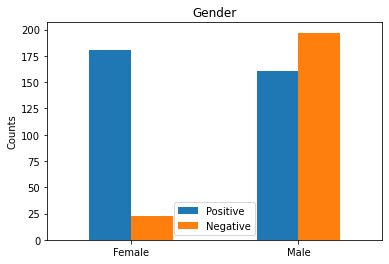

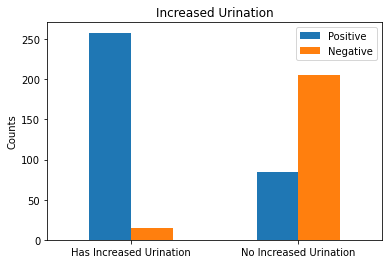

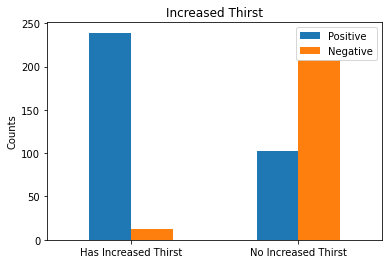

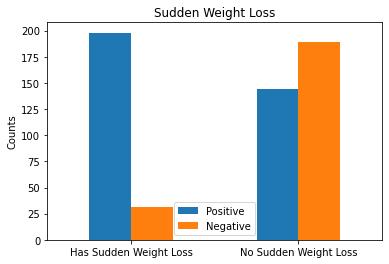

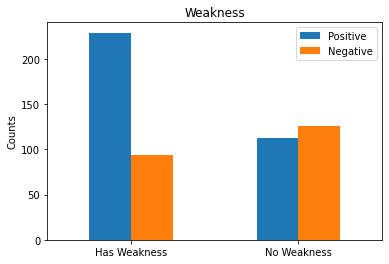

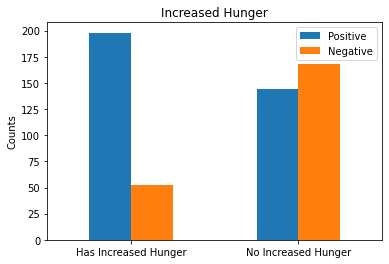

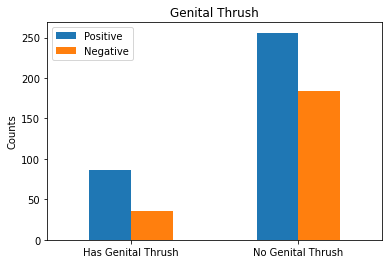

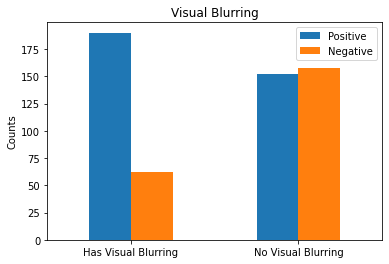

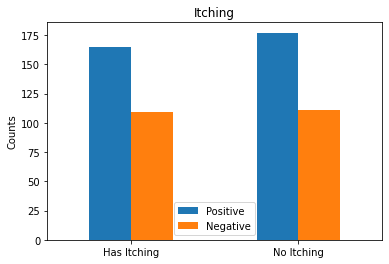

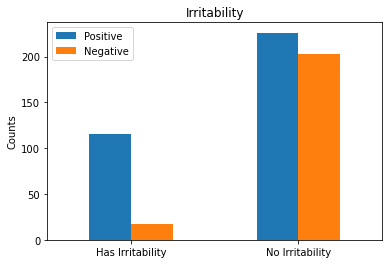

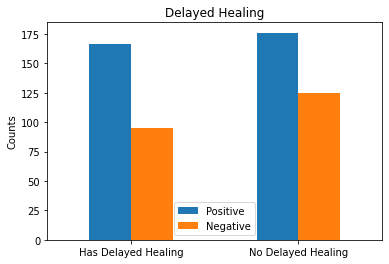

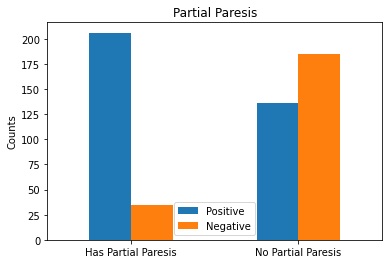

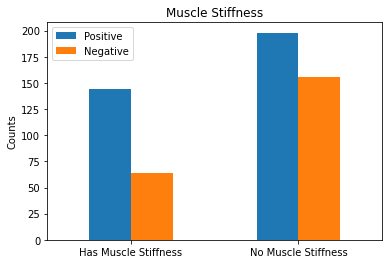

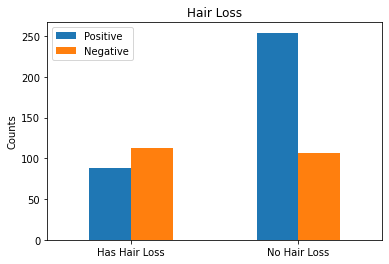

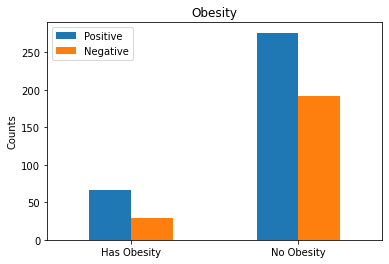

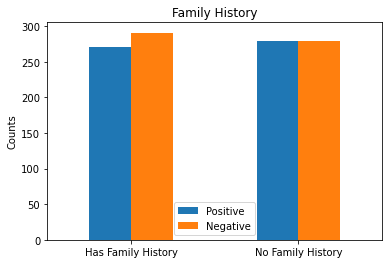

In [6]:
#create a nested dictionary that shows the relationship between feature and label.
#keys: 1.positive feature 2.negative feature
#values for each key: 1. number of positive diagnosis 2.number of negative diagnosis
#We create a bar plot after defining a dictionary for a feature
label_feature_relationship={}
label_feature_relationship['Female'] = {}
label_feature_relationship['Female']['Positive'] = len(clean_Diab[(clean_Diab.Gender.str.contains('Female')) & (clean_Diab.Diagnosis.str.contains('Positive'))])
label_feature_relationship['Female']['Negative'] = len(clean_Diab[(clean_Diab.Gender.str.contains('Female')) & (clean_Diab.Diagnosis.str.contains('Negative'))])

label_feature_relationship['Male'] = {}
label_feature_relationship['Male']['Positive'] = len(clean_Diab[(clean_Diab.Gender.str.contains('Male')) & (clean_Diab.Diagnosis.str.contains('Positive'))])
label_feature_relationship['Male']['Negative'] = len(clean_Diab[(clean_Diab.Gender.str.contains('Male')) & (clean_Diab.Diagnosis.str.contains('Negative'))])

df = pd.DataFrame.from_dict(label_feature_relationship)
df = df.T
df.plot.bar(rot=0, title='Gender')
plt.ylabel('Counts')
plt.show()

for i in range(2,16):
    title = clean_Diab.columns[i]
    label_feature_relationship = {}
    label_feature_relationship["Has %s" %title] = {}
    label_feature_relationship["Has %s" %title]['Positive'] = len(clean_Diab[(clean_Diab[title].str.contains('Yes')) & clean_Diab.Diagnosis.str.contains('Positive')])
    label_feature_relationship["Has %s" %title]['Negative'] = len(clean_Diab[(clean_Diab[title].str.contains('Yes')) & clean_Diab.Diagnosis.str.contains('Negative')])
    label_feature_relationship["No %s" % title] = {}
    label_feature_relationship["No %s" % title]['Positive'] = len(clean_Diab[(clean_Diab[title].str.contains('No')) & clean_Diab.Diagnosis.str.contains('Positive')])
    label_feature_relationship["No %s" % title]['Negative'] = len(clean_Diab[(clean_Diab[title].str.contains('No')) & clean_Diab.Diagnosis.str.contains('Negative')])
    df = pd.DataFrame.from_dict(label_feature_relationship)
    df = df.T
    df.plot.bar(rot=0, title=title)
    plt.ylabel('Counts')
    plt.show()

label_feature_relationship = {}
label_feature_relationship["Has Family History"] = {}
label_feature_relationship["Has Family History"]['Positive'] = len(clean_Diab.loc[clean_Diab['Family History']==1 & clean_Diab.Diagnosis.str.contains('Positive')])
label_feature_relationship["Has Family History"]['Negative'] = len(clean_Diab.loc[clean_Diab['Family History']==1 & clean_Diab.Diagnosis.str.contains('Negative')])
label_feature_relationship["No Family History"] = {}
label_feature_relationship["No Family History"]['Positive'] = len(clean_Diab.loc[clean_Diab['Family History']==0 & clean_Diab.Diagnosis.str.contains('Positive')])
label_feature_relationship["No Family History"]['Negative'] = len(clean_Diab.loc[clean_Diab['Family History']==0 & clean_Diab.Diagnosis.str.contains('Negative')])
df = pd.DataFrame.from_dict(label_feature_relationship)
df = df.T
df.plot.bar(rot=0, title='Family History')
plt.ylabel('Counts')
plt.show()

## 3c:

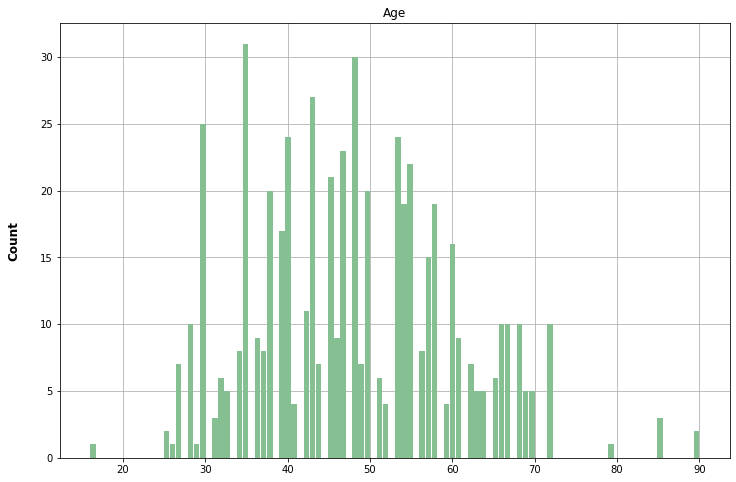

In [7]:
#1. Is there an age from which the chance of getting sick increases significantly?- A histogram is drawn showing a connection between age and count of positive diagnosis:
ax = clean_Diab.hist(column='Age', bins= 100, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)
plt.show()

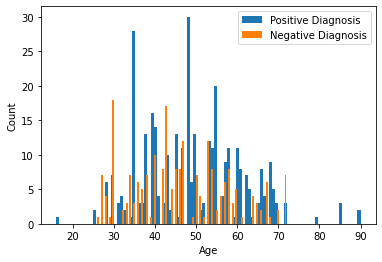

In [8]:
#2. Compare age histogram for positive diagnosis and age histogram for negative diagnosis:
positive_age_series = clean_Diab[clean_Diab.Diagnosis.str.contains('Positive')]['Age']
negative_age_series = clean_Diab[clean_Diab.Diagnosis.str.contains('Negative')]['Age']
plt.hist(positive_age_series, bins=100, label='Positive Diagnosis')
plt.hist(negative_age_series, bins=100, label='Negative Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

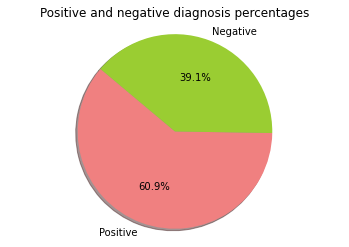

In [9]:
#3. Pie chart of positive/negative diagnosis: We want to check if the labels are balanced in the DataFrame.
positive_count = 0
negative_count = 0
for idx, value in enumerate(clean_Diab['Diagnosis']):
    if value =='Positive':
        positive_count +=1
    else:
        negative_count +=1
labels = ('Positive', 'Negative')
sizes = [positive_count, negative_count]
colors = ['lightcoral', 'yellowgreen']
figureObject, axesObject = plt.subplots()
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Positive and negative diagnosis percentages")
plt.show()

## 3d

i)  1- It can be seen that there is no age group from which the chance of getting sick increases significantly.  
    2- On the other hand, T1D has a tendency to erupt between the ages of 10-20, and this graph shows that the data does not contain information about enough  patients in these age ranges.
       No significant information can be deduced from this feature.
    3- We wanted to check how the percentage of labels is divided. We can see that the percentage of positive label is relatively high compared  to the percentage of negative label,
       which means that we received biased data. This result may be due to the selection of a relatively small sample group.
       
ii) From section 3b, we didn't learn much, just that our data is biased. On the other hand, based on scetion 3a we have learned there are 3 imformative features: Increased urination, Increased Thirst, Sudden Weight
Loss. for positive feature label, they present high number of positive diagnosed, while for a negative label they present a low number of positive diagnosed.

## Question 4

In [10]:
#Encoding our data as one hot vectors
X_binary = X.replace(['Yes','Female','Positive'],value = 1)
X_binary = X_binary.replace(['No','Male','Negative'],value = 0)
X_binary['Age'] = (X_binary['Age']-X_binary['Age'].mean())/X_binary['Age'].std()
y_binary = y.replace(['Positive'],value = 1)
y_binary = y_binary.replace(['Negative'],value = 0)

x_onehotvector = X_binary
y_onehotvector = np.array(y_binary).ravel()


## Qusetion 5

In [11]:
X_train, x_test, Y_train, y_test = train_test_split(x_onehotvector, y_onehotvector, test_size = 0.20, random_state = 0, stratify = y_onehotvector)
# K cross fold+ SVM ( linear for 'svm_kernel':['linear'], non linear for 'svm_kernel':['rbf'])
# Linear SVM model
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, scoring=['roc_auc'],  cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train, Y_train)
best_svm_lin = svm_lin.best_estimator_


calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

y_pred_test_lin = best_svm_lin.predict(x_test)
y_pred_proba_test_lin = best_svm_lin.predict_proba(x_test)
lin_loss = hinge_loss(y_test, y_pred_proba_test_lin[:,1])
LSVM_score = roc_auc_score(y_test, y_pred_proba_test_lin[:,1])

TN = calc_TN(y_test, y_pred_test_lin)
FP = calc_FP(y_test, y_pred_test_lin)
FN = calc_FN(y_test, y_pred_test_lin)
TP = calc_TP(y_test, y_pred_test_lin)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)

#Non- linear SVM (RBF Kernel):
pipe_rbf = Pipeline(steps=[('svm', svc)])
svm_rbf = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf'], 'svm__C':C}, scoring=['roc_auc'],  cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

svm_rbf.fit(X_train, Y_train)
best_svm_rbf = svm_rbf.best_estimator_

y_pred_test_rbf = best_svm_rbf.predict(x_test)
y_pred_proba_test_rbf = best_svm_rbf.predict_proba(x_test)
rbf_loss = hinge_loss(y_test, y_pred_proba_test_rbf[:,1])
rbf_SVM_score = roc_auc_score(y_test, y_pred_proba_test_rbf[:,1])

TN_nl = calc_TN(y_test, y_pred_test_rbf)
FP_nl = calc_FP(y_test, y_pred_test_rbf)
FN_nl = calc_FN(y_test, y_pred_test_rbf)
TP_nl = calc_TP(y_test, y_pred_test_rbf)
Se_nl = TP/(TP+FN)
Sp_nl = TN/(TN+FP)
PPV_nl = TP/(TP+FP)
NPV_nl = TN/(TN+FN)
Acc_nl = (TP+TN)/(TP+TN+FP+FN)
F1_nl = (2*Se*PPV)/(Se+PPV)

print("svm with  linear kernel:")
print(f'Sensitivity is {Se:.2f}')
print(f'Specificity is {Sp:.2f}')
print(f'PPV is {PPV:.2f}')
print(f'NPV is {NPV:.2f}')
print(f'Accuracy is {Acc:.2f}')
print(f'F1 is {F1:.2f}')
print(f'The Linear Loss is {lin_loss:.2f}')
print(f'AUC is {LSVM_score:.2f}')
print("\n svm with rbf kernel:")
print(f' Sensitivity is {Se_nl:.2f}')
print(f' Specificity is {Sp_nl:.2f}')
print(f' PPV is {PPV_nl:.2f}')
print(f' NPV is {NPV_nl:.2f}')
print(f' Accuracy is {Acc_nl:.2f}')
print(f' F1 is {F1_nl:.2f}')
print(f' Loss is {rbf_loss:.2f}')
print(f' AUC is {rbf_SVM_score:.2f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.947, test=0.964), total=   0.1s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.940, test=0.948), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.937, test=0.912), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.945, test=0.905), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.936, test=0.944), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.958, test=0.969), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.957, test=0.965), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.960, test=0.949), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.964, test=0.919), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.951, test=0.971), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, roc_auc

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   32.7s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.969, test=0.981), total=   0.0s
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.965, test=0.974), total=   0.0s
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.967, test=0.941), total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.970, test=0.919), total=   0.0s
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.959, test=0.969), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.969, test=0.981), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.965, test=0.974), total=   0.1s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.967, test=0.941), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.970, test=0.919), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished


## 5c. What performs best on this dataset? Linear or non-linear models?


In both linear and rbf SVM we got high measures of its performances/accuracy.
However, in the non-linear model we got slightly higher values and smaller loss levels so we would prefer to classify the data with non linear SVM with rbf Kernel.

## Question 6- Feature Selection

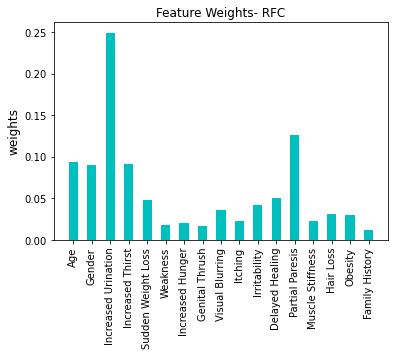

In [12]:
#Random Forest Network
clf = rfc(n_estimators=10)
clf.fit(X_train, Y_train)
w_ = clf.feature_importances_

features=['Age','Gender','Increased Urination', 'Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History']
x = np.arange(len(features))
x=np.ndarray.tolist(x)
w_ = np.ndarray.tolist(w_)
plt.bar(x, w_,0.5, color='c')
plt.xticks(x,features,rotation=90);
plt.ylabel("weights", fontsize=12)
plt.title("Feature Weights- RFC")
plt.show()


## i. What are the 2 most important features according to the random forest.

According to the attached data about type 1 diabetes the two most common symptomes are- Increased thirst
Frequent urination. Thus, they are the two most important features.

## ii. Does this match up exactly with the feature exploration you did?

According to the data exploration we got that the most important features are Increased Urination and Increased Thirst.
Both of these features had the the largers weights in most of the runs of the code and therefore have the largest influence.
This match up well with the feature exploration in most of the runs. The both symptomes are very important and influence each other.
However,this symptomes are not the only ones that influence type 1 diabetes and taking different groupes may divert the results torwards
different features.

## Question 7

## 7a- PCA 2D

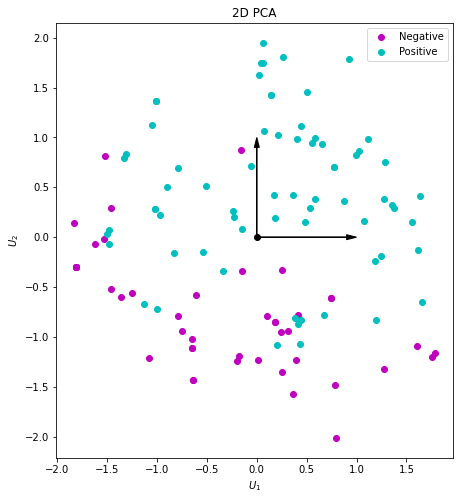

In [13]:
n_components = 2
pca = PCA(n_components = n_components, whiten= True)
X_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(x_test)

def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='m')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='c')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

plt_2d_pca(x_test_pca, y_test)

## 7b

Our data is not that seperable: there is no decision boundry that can help us fully seperate the different diagnosis labels.

## 7c: Models with PCA

In [14]:
# Linear SVM model
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, scoring=['roc_auc'],  cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train_pca, Y_train)
best_svm_lin = svm_lin.best_estimator_

calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

y_pred_test_lin = best_svm_lin.predict(x_test_pca)
y_pred_proba_test_lin = best_svm_lin.predict_proba(x_test_pca)
lin_loss = hinge_loss(y_test, y_pred_proba_test_lin[:,1])
LSVM_score = roc_auc_score(y_test, y_pred_proba_test_lin[:,1])

TN = calc_TN(y_test, y_pred_test_lin)
FP = calc_FP(y_test, y_pred_test_lin)
FN = calc_FN(y_test, y_pred_test_lin)
TP = calc_TP(y_test, y_pred_test_lin)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)

#Non- linear SVM (RBF Kernel):
pipe_rbf = Pipeline(steps=[('svm', svc)])
svm_rbf = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf'], 'svm__C':C}, scoring=['roc_auc'],  cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

svm_rbf.fit(X_train_pca, Y_train)
best_svm_rbf = svm_rbf.best_estimator_

y_pred_test_rbf = best_svm_rbf.predict(x_test_pca)
y_pred_proba_test_rbf = best_svm_rbf.predict_proba(x_test_pca)
rbf_loss = hinge_loss(y_test, y_pred_proba_test_rbf[:,1])
rbf_SVM_score = roc_auc_score(y_test, y_pred_proba_test_rbf[:,1])

TN_nl = calc_TN(y_test, y_pred_test_rbf)
FP_nl = calc_FP(y_test, y_pred_test_rbf)
FN_nl = calc_FN(y_test, y_pred_test_rbf)
TP_nl = calc_TP(y_test, y_pred_test_rbf)
Se_nl = TP/(TP+FN)
Sp_nl = TN/(TN+FP)
PPV_nl = TP/(TP+FP)
NPV_nl = TN/(TN+FN)
Acc_nl = (TP+TN)/(TP+TN+FP+FN)
F1_nl = (2*Se*PPV)/(Se+PPV)

print("svm with  linear kernel:")
print(f'Sensitivity is {Se:.2f}')
print(f'Specificity is {Sp:.2f}')
print(f'PPV is {PPV:.2f}')
print(f'NPV is {NPV:.2f}')
print(f'Accuracy is {Acc:.2f}')
print(f'F1 is {F1:.2f}')
print(f'The Linear Loss is {lin_loss:.2f}')
print(f'AUC is {LSVM_score:.2f}')
print("\n svm with rbf kernel:")
print(f' Sensitivity is {Se_nl:.2f}')
print(f' Specificity is {Sp_nl:.2f}')
print(f' PPV is {PPV_nl:.2f}')
print(f' NPV is {NPV_nl:.2f}')
print(f' Accuracy is {Acc_nl:.2f}')
print(f' F1 is {F1_nl:.2f}')
print(f' Loss is {rbf_loss:.2f}')
print(f' AUC is {rbf_SVM_score:.2f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.933, test=0.945), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.933, test=0.942), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.928, test=0.919), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.935, test=0.899), total=   0.0s
[CV] svm__C=0.001, svm__kernel=linear ................................
[CV]  svm__C=0.001, svm__kernel=linear, roc_auc=(train=0.922, test=0.942), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, roc_auc=(train=0.935, test=0.9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  svm__C=1.0, svm__kernel=linear, roc_auc=(train=0.943, test=0.925), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, roc_auc=(train=0.935, test=0.953), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, roc_auc=(train=0.946, test=0.915), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, roc_auc=(train=0.934, test=0.959), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, roc_auc=(train=0.935, test=0.950), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, roc_auc=(train=0.943, test=0.924), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, roc_auc=(t

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.931, test=0.937), total=   0.0s
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.946, test=0.882), total=   0.0s
[CV] svm__C=0.001, svm__kernel=rbf ...................................
[CV]  svm__C=0.001, svm__kernel=rbf, roc_auc=(train=0.930, test=0.940), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.931, test=0.959), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.934, test=0.943), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.931, test=0.937), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, roc_auc=(train=0.946, te

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.1s finished


## 7d: Train the same models on the best two features from section 6: Increased Urination, Increased Thirst

In [15]:
# K cross fold+ SVM ( linear for 'svm_kernel':['linear'], non linear for 'svm_kernel':['rbf'])
# Linear SVM model
X_train_2feat = X_train[['Increased Urination','Increased Thirst']]
x_test_2feat = x_test[['Increased Urination','Increased Thirst']]
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc = SVC(probability=True)
C = np.array([0.1, 10, 100, 1000])
pipe = Pipeline(steps=[('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, scoring=['roc_auc'],  cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(X_train_2feat, Y_train)
best_svm_lin = svm_lin.best_estimator_

calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

y_pred_test_lin = best_svm_lin.predict(x_test_2feat)
y_pred_proba_test_lin = best_svm_lin.predict_proba(x_test_2feat)
lin_loss = hinge_loss(y_test, y_pred_proba_test_lin[:,1])
LSVM_score = roc_auc_score(y_test, y_pred_proba_test_lin[:,1])

TN = calc_TN(y_test, y_pred_test_lin)
FP = calc_FP(y_test, y_pred_test_lin)
FN = calc_FN(y_test, y_pred_test_lin)
TP = calc_TP(y_test, y_pred_test_lin)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)

#Non- linear SVM (RBF Kernel):
pipe_rbf = Pipeline(steps=[('svm', svc)])
svm_rbf = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf'], 'svm__C':C}, scoring=['roc_auc'],  cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

svm_rbf.fit(X_train_2feat, Y_train)
best_svm_rbf = svm_rbf.best_estimator_

y_pred_test_rbf = best_svm_rbf.predict(x_test_2feat)
y_pred_proba_test_rbf = best_svm_rbf.predict_proba(x_test_2feat)
rbf_loss = hinge_loss(y_test, y_pred_proba_test_rbf[:,1])
rbf_SVM_score = roc_auc_score(y_test, y_pred_proba_test_rbf[:,1])

TN_nl = calc_TN(y_test, y_pred_test_rbf)
FP_nl = calc_FP(y_test, y_pred_test_rbf)
FN_nl = calc_FN(y_test, y_pred_test_rbf)
TP_nl = calc_TP(y_test, y_pred_test_rbf)
Se_nl = TP/(TP+FN)
Sp_nl = TN/(TN+FP)
PPV_nl = TP/(TP+FP)
NPV_nl = TN/(TN+FN)
Acc_nl = (TP+TN)/(TP+TN+FP+FN)
F1_nl = (2*Se*PPV)/(Se+PPV)

print("svm with  linear kernel:")
print(f'Sensitivity is {Se:.2f}')
print(f'Specificity is {Sp:.2f}')
print(f'PPV is {PPV:.2f}')
print(f'NPV is {NPV:.2f}')
print(f'Accuracy is {Acc:.2f}')
print(f'F1 is {F1:.2f}')
print(f'The Linear Loss is {lin_loss:.2f}')
print(f'AUC is {LSVM_score:.2f}')
print("\n svm with rbf kernel:")
print(f' Sensitivity is {Se_nl:.2f}')
print(f' Specificity is {Sp_nl:.2f}')
print(f' PPV is {PPV_nl:.2f}')
print(f' NPV is {NPV_nl:.2f}')
print(f' Accuracy is {Acc_nl:.2f}')
print(f' F1 is {F1_nl:.2f}')
print(f' Loss is {rbf_loss:.2f}')
print(f' AUC is {rbf_SVM_score:.2f}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, roc_auc=(train=0.901, test=0.921), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, roc_auc=(train=0.910, test=0.883), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, roc_auc=(train=0.902, test=0.920), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, roc_auc=(train=0.910, test=0.884), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, roc_auc=(train=0.901, test=0.920), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=10.0, svm__kernel=linear, roc_auc=(train=0.901, test=0.917), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, roc_auc=(train=0.909, test=0.886), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, roc_auc=(train=0.900, test=0.920), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, roc_auc=(train=0.911, test=0.875), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, roc_auc=(train=0.899, test=0.924), total=   0.0s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, roc_auc=(train=0.901, test=0.917), total=   0.0s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, roc_a

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, roc_auc=(train=0.837, test=0.801), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, roc_auc=(train=0.853, test=0.928), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, roc_auc=(train=0.856, test=0.905), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, roc_auc=(train=0.910, test=0.883), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, roc_auc=(train=0.864, test=0.883), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, roc_auc=(train=0.886, test=0.801), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished


## 7e. What performs better? 2 features or the reduced dimensionality.

The more accurate model is for the 2 features, as seen for most of the statistics calculated. 
This result makes a lot of sense: according to the theory learned in the tutorial, preprocessing using PCA reduces dimensions, therefore some data is lost so that less accurate results are obtained. 
In addition, a PCA model on data that is mostly binary is not particularly useful. Centering has no meaning as the process requires; Traditional PCA puts the origin (0,0) into data mean (center). For mostly, binary data, mean is not a logical data value.